In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### Loading the data


In [7]:
train_data = pd.read_excel('train_data.xlsx')
test_data = pd.read_excel('test_data.xlsx')



### Shape of data 


In [8]:
print("Training data shape:", train_data.shape)
print("\nTest data shape:", test_data.shape)


Training data shape: (113705, 17)

Test data shape: (8455, 17)


### Display first few rows for getting few info


In [9]:
print("First few rows of training data:")
display(train_data.head())

First few rows of training data:


,customer_id,transaction_date,sub_grade,term,home_ownership,cibil_score,total_no_of_acc,annual_inc,int_rate,purpose,loan_amnt,application_type,installment,verification_status,account_bal,emp_length,loan_status
0,10608026,2014-01-01,C5,36 months,MORTGAGE,665,9,70000.0,16.24,debt_consolidation,7200,Individual,253.99,Verified,4648,11,0
1,10235120,2014-01-01,E5,36 months,MORTGAGE,660,8,65000.0,23.40,home_improvement,6000,Individual,233.52,Source Verified,14051,11,1
2,10705805,2014-01-01,D2,36 months,MORTGAGE,660,7,73000.0,17.57,other,8000,Individual,287.50,Verified,14885,11,0
3,11044991,2014-01-01,B4,36 months,MORTGAGE,690,5,118000.0,12.85,debt_consolidation,10000,Individual,336.22,Source Verified,7542,2,1
4,10161054,2014-01-01,C3,60 months,MORTGAGE,665,5,63000.0,14.98,debt_consolidation,10000,Individual,237.80,Verified,6318,11,0


### Check data types and missing values

In [10]:
print("Data types and missing values in training data:")
display(train_data.info())

Data types and missing values in training data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113705 entries, 0 to 113704
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   customer_id          113705 non-null  int64         
 1   transaction_date     113705 non-null  datetime64[ns]
 2   sub_grade            113705 non-null  object        
 3   term                 113705 non-null  object        
 4   home_ownership       113705 non-null  object        
 5   cibil_score          113705 non-null  int64         
 6   total_no_of_acc      113705 non-null  int64         
 7   annual_inc           113705 non-null  float64       
 8   int_rate             113705 non-null  float64       
 9   purpose              113705 non-null  object        
 10  loan_amnt            113705 non-null  int64         
 11  application_type     113705 non-null  object        
 12  installment          113

None

#### There are no null values in our data

### Statistical summary


In [11]:
print("Statistical summary of numerical columns:")
display(train_data.describe())

Statistical summary of numerical columns:


,customer_id,transaction_date,cibil_score,total_no_of_acc,annual_inc,int_rate,loan_amnt,installment,account_bal,emp_length,loan_status
count,1.137050e+05,113705,113705.000000,113705.000000,1.137050e+05,113705.000000,113705.000000,113705.000000,113705.000000,113705.000000,113705.000000
mean,4.359137e+07,2015-03-04 22:24:20.769535232,684.398707,0.272934,7.138822e+04,15.955469,15158.144980,454.241150,15820.487094,5.959782,0.738895
min,3.630090e+05,2014-01-01 00:00:00,660.000000,0.000000,0.000000e+00,12.050000,1000.000000,33.240000,0.000000,0.000000,0.000000
25%,2.509597e+07,2014-08-01 00:00:00,665.000000,0.000000,4.300000e+04,13.330000,8000.000000,265.740000,5656.000000,2.000000,0.000000
50%,4.504932e+07,2015-04-01 00:00:00,680.000000,0.000000,6.000000e+04,14.990000,13300.000000,388.290000,10841.000000,6.000000,1.000000
75%,6.134344e+07,2015-10-01 00:00:00,695.000000,0.000000,8.500000e+04,17.860000,20225.000000,599.530000,19682.000000,11.000000,1.000000
max,7.615383e+07,2016-03-01 00:00:00,845.000000,10.000000,8.900060e+06,28.990000,40000.000000,1460.430000,875598.000000,11.000000,1.000000
std,2.016104e+07,NaN,22.871241,0.647328,6.050616e+04,3.234215,9091.279851,268.251678,20447.614824,4.229570,0.439239


#### We don't need all columns for statistical analysis, so taking only relevant columns below


In [12]:
relevant = [
    'cibil_score',
    'total_no_of_acc',
    'annual_inc',
    'int_rate',
    'loan_amnt',
    'installment',
    'account_bal',
    'emp_length'
]

print("Statistical summary of necessary numerical columns:")
display(train_data[relevant].describe())

Statistical summary of necessary numerical columns:


,cibil_score,total_no_of_acc,annual_inc,int_rate,loan_amnt,installment,account_bal,emp_length
count,113705.000000,113705.000000,1.137050e+05,113705.000000,113705.000000,113705.000000,113705.000000,113705.000000
mean,684.398707,0.272934,7.138822e+04,15.955469,15158.144980,454.241150,15820.487094,5.959782
std,22.871241,0.647328,6.050616e+04,3.234215,9091.279851,268.251678,20447.614824,4.229570
min,660.000000,0.000000,0.000000e+00,12.050000,1000.000000,33.240000,0.000000,0.000000
25%,665.000000,0.000000,4.300000e+04,13.330000,8000.000000,265.740000,5656.000000,2.000000
50%,680.000000,0.000000,6.000000e+04,14.990000,13300.000000,388.290000,10841.000000,6.000000
75%,695.000000,0.000000,8.500000e+04,17.860000,20225.000000,599.530000,19682.000000,11.000000
max,845.000000,10.000000,8.900060e+06,28.990000,40000.000000,1460.430000,875598.000000,11.000000


### Distribution of Loan Status

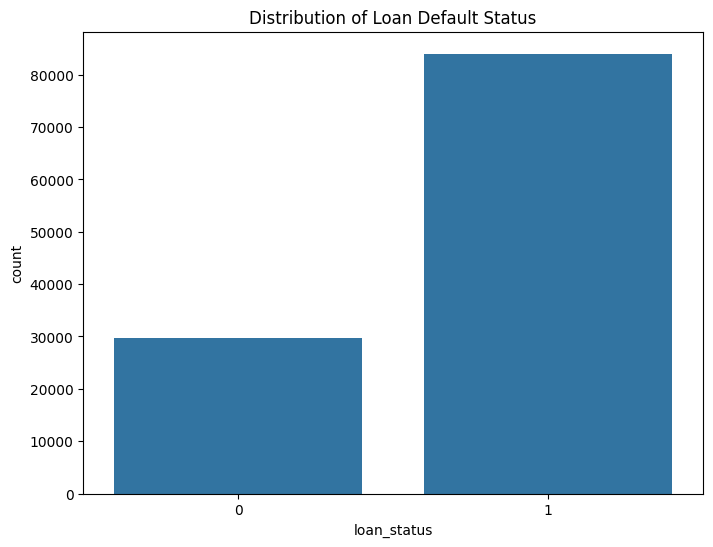

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, x='loan_status')
plt.title('Distribution of Loan Default Status')
plt.show()


### Coorelation analysis for checking coorelation between numerical datatypes

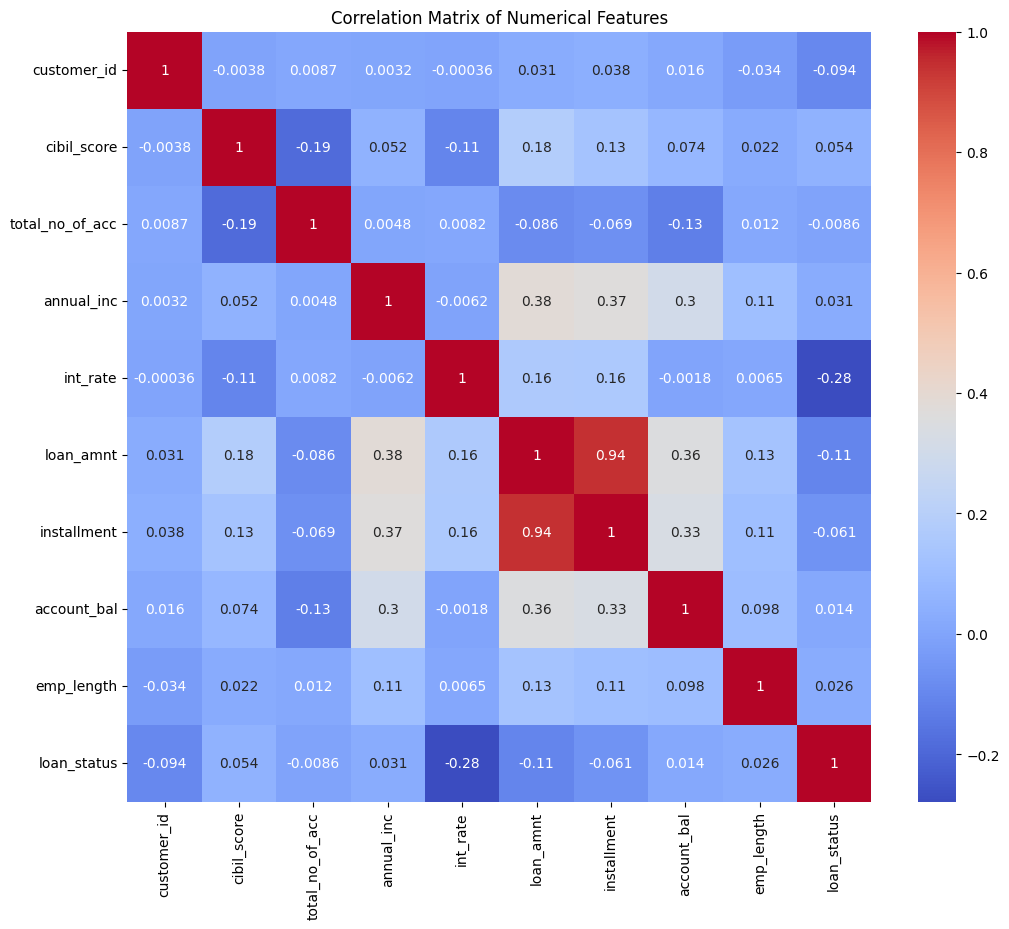

In [14]:
plt.figure(figsize=(12, 10))
correlation_matrix = train_data.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#### In the above figure, we have got some moderate coorelations between data.
<i> annual_inc & loan_amnt (0.38): Moderate correlation showing higher income borrowers tend to get larger loans</i>
<i>int_rate & loan_status (-0.28): Negative correlation indicating higher interest rates are somewhat associated with defaults</i>

### Analyze useful categorical variables


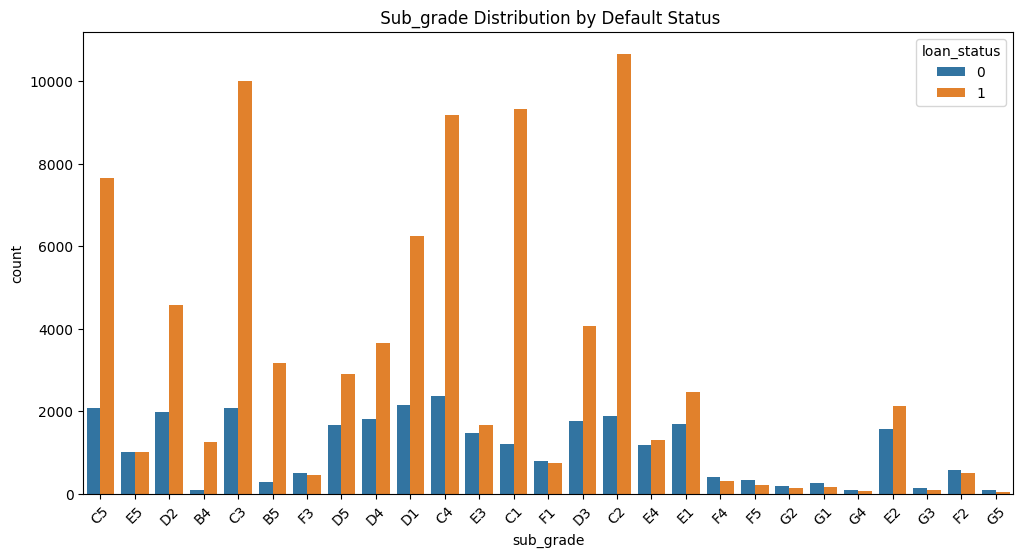

In [15]:
categorical_cols = ['sub_grade', 'home_ownership', 'purpose', 
                   'application_type', 'verification_status']
plt.figure(figsize=(12,6))
sns.countplot(data=train_data, x="sub_grade", hue='loan_status')
plt.title(' Sub_grade Distribution by Default Status')
plt.xticks(rotation=45)
plt.show()

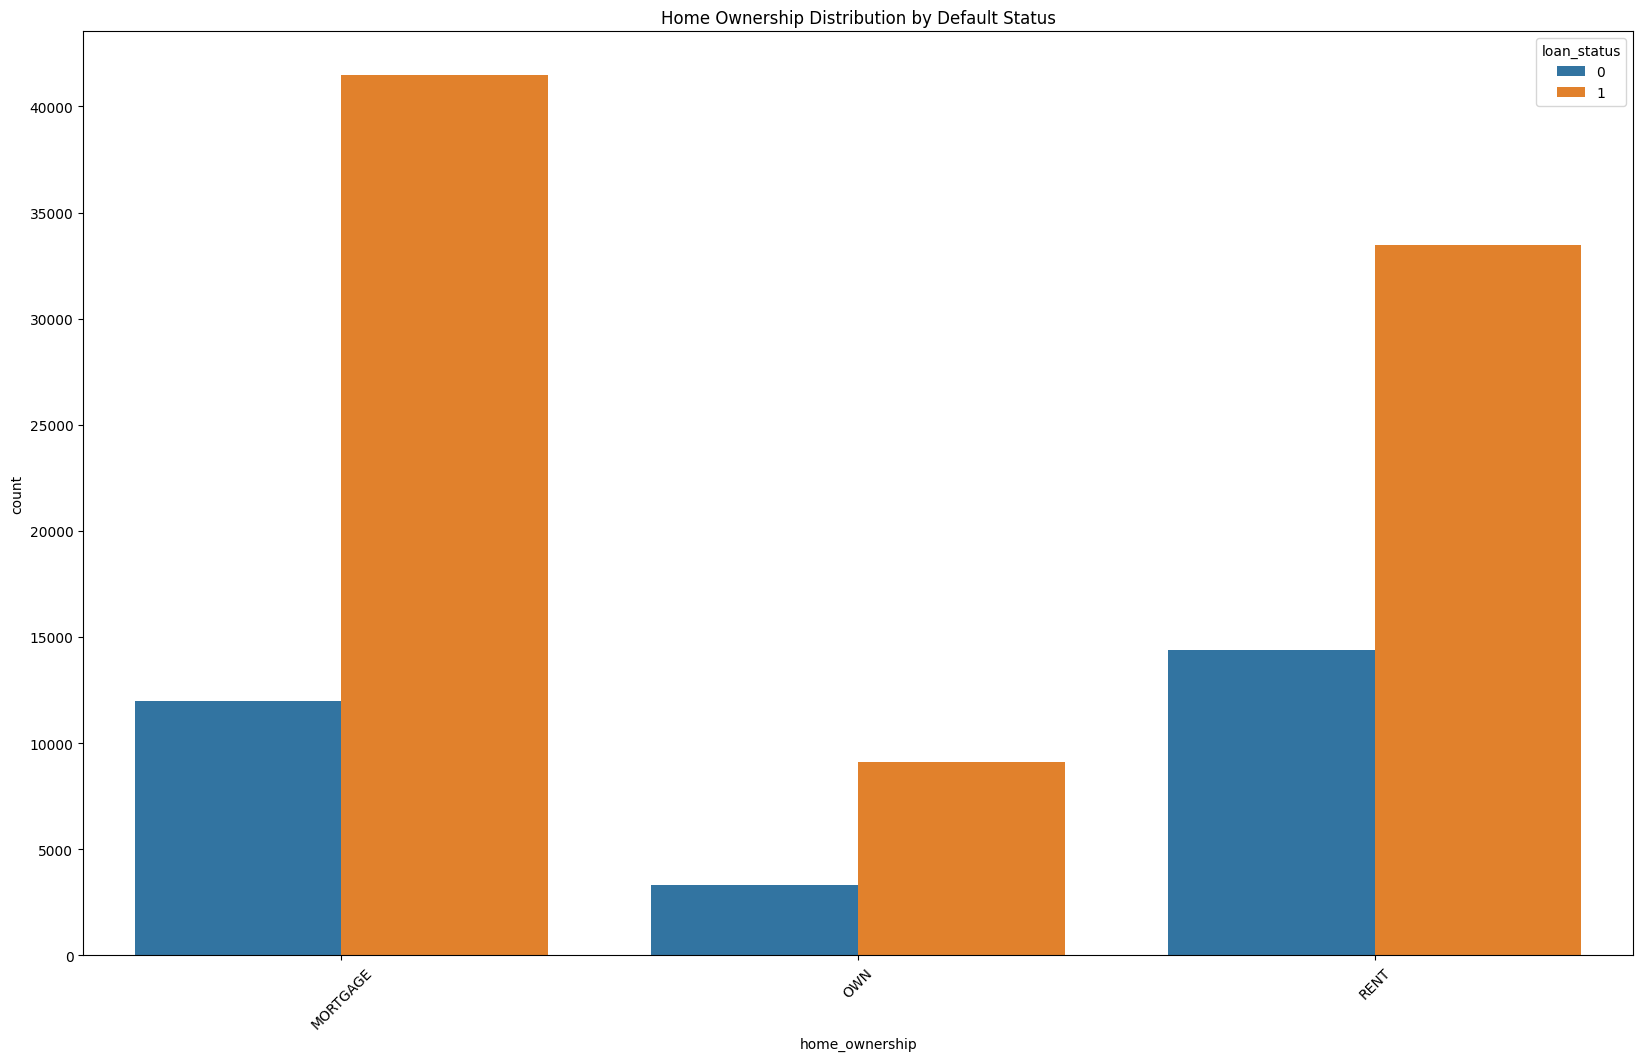


Percentage Distribution of Home Ownership Categories:

MORTGAGE:
Overall Percentage: 47.02%
Default Rate: 77.54%
Non-Default Rate: 22.46%

OWN:
Overall Percentage: 10.92%
Default Rate: 73.41%
Non-Default Rate: 26.59%

RENT:
Overall Percentage: 42.07%
Default Rate: 69.93%
Non-Default Rate: 30.07%


In [16]:
plt.figure(figsize=(20,12))
sns.countplot(data=train_data, x="home_ownership", hue='loan_status')
plt.title('Home Ownership Distribution by Default Status')
plt.xticks(rotation=45)
plt.show()
home = train_data.groupby('home_ownership').agg({
   'loan_status': ['count', 'mean']
}).round(4)

# Rename columns and calculate percentages
home.columns = ['Total_Count', 'Default_Rate']
home['Default_Rate'] = (home['Default_Rate'] * 100).round(2)
home['Non_Default_Rate'] = (100 - home['Default_Rate']).round(2)
# Print percentage contribution of each catsegory
print("\nPercentage Distribution of Home Ownership Categories:")
total_loans = len(train_data)
for index, row in home.iterrows():
   print(f"\n{index}:")
   print(f"Overall Percentage: {(row['Total_Count']/total_loans*100):.2f}%")
   print(f"Default Rate: {row['Default_Rate']}%")
   print(f"Non-Default Rate: {row['Non_Default_Rate']}%")

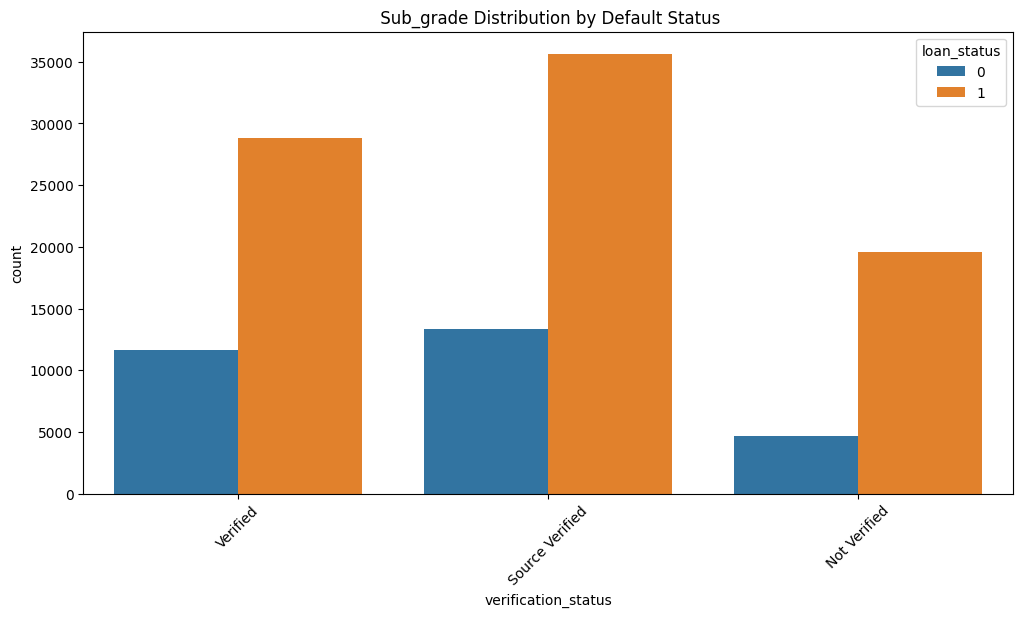

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(data=train_data, x="verification_status", hue='loan_status')
plt.title(' Sub_grade Distribution by Default Status')
plt.xticks(rotation=45)
plt.show()

### Time series analysis of defaults


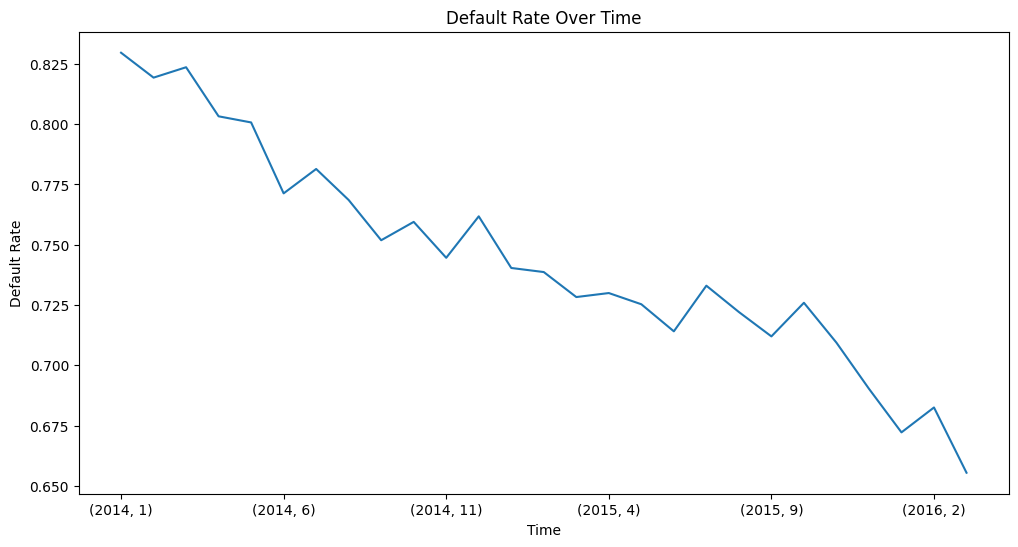

In [18]:
train_data['transaction_date'] = pd.to_datetime(train_data['transaction_date'])
defaults_over_time = train_data.groupby([
    train_data['transaction_date'].dt.year,
    train_data['transaction_date'].dt.month
])['loan_status'].mean()

plt.figure(figsize=(12, 6))
defaults_over_time.plot()
plt.title('Default Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Default Rate')
plt.show()

We can see that the default rate has been decreasing over time